In [1]:
import pandas as pd

In [43]:
test_result = pd.read_csv('test_results.tsv',sep='\t',header=None)     #tsv使用/t作为分隔符   取消默认第一行的表头

In [44]:
print(test_result)

            0         1
0    0.996199  0.003801
1    0.001408  0.998592
2    0.895401  0.104599
3    0.990331  0.009669
4    0.997237  0.002763
..        ...       ...
772  0.997034  0.002966
773  0.424192  0.575808
774  0.996730  0.003270
775  0.001436  0.998564
776  0.001417  0.998583

[777 rows x 2 columns]


In [60]:
test_result[2]=test_result.apply(lambda x:0 if x[0]>0.5 else 1 , axis=1)  # 记得加后面这个
test_result

,0,1,2
0,0.996199,0.003801,0
1,0.001408,0.998592,1
2,0.895401,0.104599,0
3,0.990331,0.009669,0
4,0.997237,0.002763,0
...,...,...,...
772,0.997034,0.002966,0
773,0.424192,0.575808,1
774,0.996730,0.003270,0
775,0.001436,0.998564,1


In [61]:
test_result_line = test_result.iloc[:,2]
print(test_result_line)   # 单独抽离出来的结果预测结果

0      0
1      1
2      0
3      0
4      0
      ..
772    0
773    1
774    0
775    1
776    1
Name: 2, Length: 777, dtype: int64


In [62]:
test_origin = pd.read_csv('test.tsv',sep='\t',usecols=[0],header=None)  # 读取Noneheader  只读取第一列   忽略内容的/t

In [63]:
print(test_origin)

     0
0    0
1    1
2    1
3    0
4    0
..  ..
772  0
773  0
774  0
775  1
776  1

[777 rows x 1 columns]


In [64]:
test_origin_line = test_origin.iloc[:,0]
print(test_origin_line)   # 单独抽离出来的初始结果

0      0
1      1
2      1
3      0
4      0
      ..
772    0
773    0
774    0
775    1
776    1
Name: 0, Length: 777, dtype: int64


# 2 开始进行指标的计算

## 2.1混淆矩阵

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

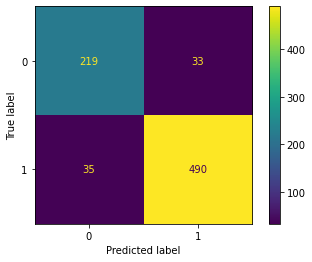

In [66]:
cm = confusion_matrix(test_origin_line,test_result_line)
cm_display = ConfusionMatrixDisplay(cm).plot()

## 2.2准确率Accuracy

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score_result=accuracy_score(test_origin_line,test_result_line)

## 2.3精确率

In [78]:
from sklearn.metrics import precision_score

In [79]:
precision_score_result=precision_score(test_origin_line,test_result_line)

## 2.3召回率

In [80]:
from sklearn.metrics import recall_score

In [81]:
recall_score_result=recall_score(test_origin_line,test_result_line)

## 2.4f1值

In [86]:
from sklearn.metrics import f1_score
f1_score_result=f1_score(test_origin_line,test_result_line)
str(recall_score_result)

'0.9333333333333333'

## 输出

In [89]:
f = open('result.txt','w')
f.write(str(accuracy_score_result)+'\t'+str(precision_score_result)+'\t'+str(recall_score_result)+'\t'+str(f1_score_result))
f.close()